# 1
Introduction:
You must have heard some advertisements about health insurance, which promise to provide financial assistance in case of any medical emergencies. People who purchase such insurance must pay a monthly premium, and the premium amount varies significantly based on various factors.

In this project, we will attempt to extract insights from a dataset using machine learning in Python. This dataset contains detailed information about the background of individuals who purchase medical insurance and the corresponding premium amounts charged to them.

# 2
Python libraries enable us to effortlessly handle data and perform typical and complex tasks with just one line of code.

Pandas - This library aids in loading data frames in a 2D array format and offers various functionalities to perform analytical tasks all at once.

Numpy - Numpy arrays are highly efficient and can carry out a large number of computations in a short amount of time.

Matplotlib / Seaborn - These libraries are used for creating visualizations.

Sklearn - This module encompasses several pre-implemented libraries with functionalities for tasks ranging from data preprocessing to model development and evaluation.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')


Now, let's use the Pandas data frame to load the dataset and view its first five rows.

In [30]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, let's examine the shape of the dataset.

In [31]:
df.shape

(1338, 7)

The dataset consists of 1338 data points with 6 independent features and 1 target feature.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above, we can see that the dataset contains 2 columns with floating-point values, 3 columns with categorical values, and the rest consist of integer values.

We can examine descriptive statistical measures of the available continuous data in the dataset.

In [33]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3
Exploratory Data Analysis (EDA) is a method of analyzing data using visual techniques. It is used to discover trends and patterns or examine hypotheses with the help of statistical summaries and graphical representations. While conducting EDA on this dataset, we will attempt to examine the relationships between independent features, i.e., how one feature influences another feature.

In [34]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Here we can conclude that there are no missing values in the given dataset.

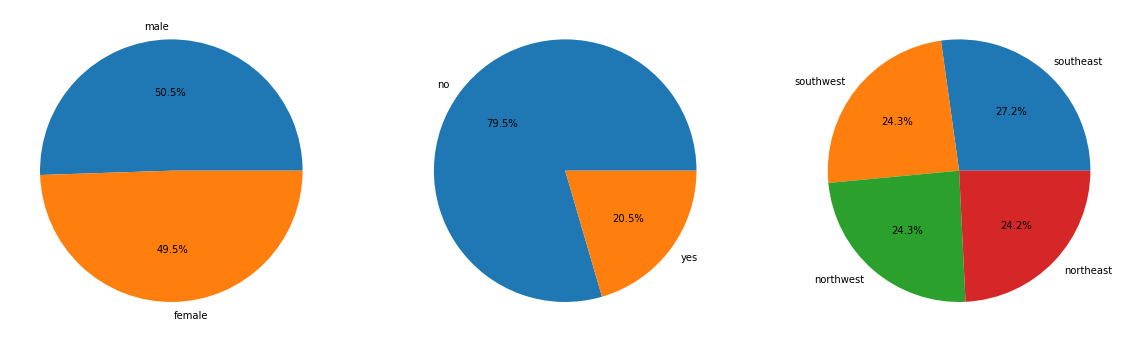

In [35]:
features = ['sex', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
  
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
  
plt.show()

The data provided to us is evenly distributed in the gender and region columns, but in the smokers' column, we can observe a proportion of 80:20.

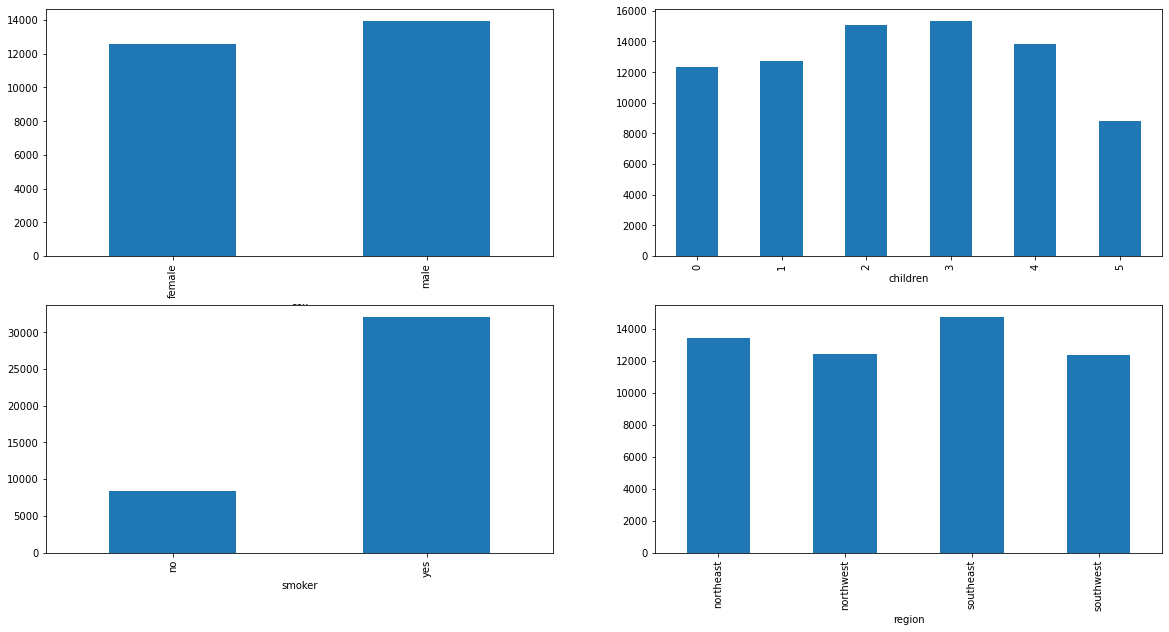

In [36]:
features = ['sex', 'children', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

Now, let's take a look at some observations from the above graphs:
- The charges for males are slightly higher than females, but the difference is not significant.
- Smokers are charged approximately three times the premium compared to non-smokers.
- The charges seem to be roughly the same across the given four regions.

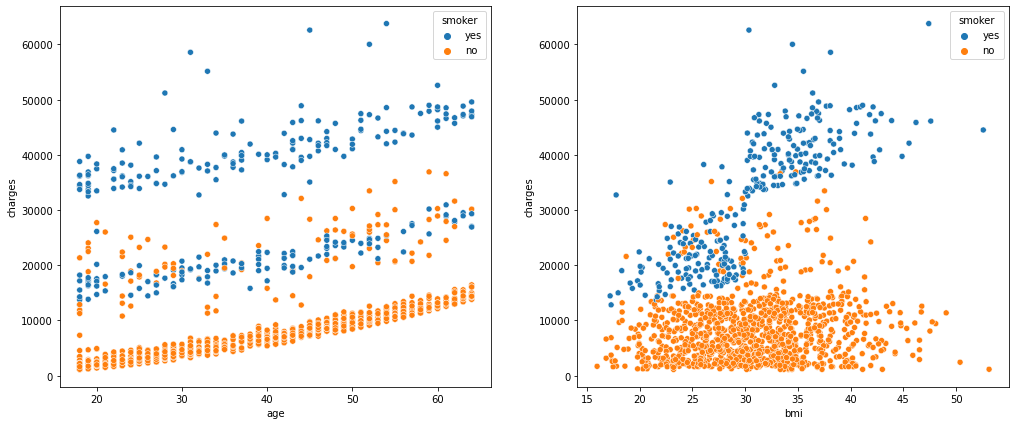

In [37]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()


Here, we can observe a noticeable difference in the charges that smokers have to pay. Additionally, we can also see that as a person's age increases, the premium also rises.

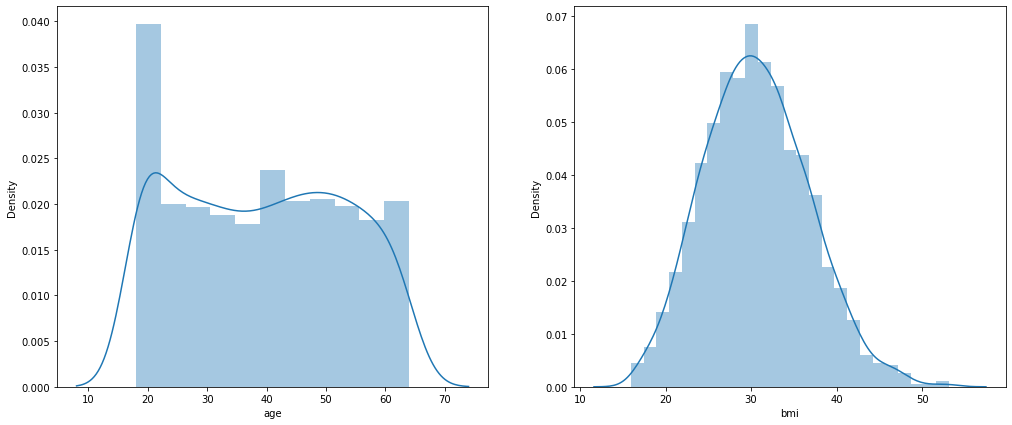

In [38]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.distplot(df[col])
plt.show()

The data in the age and BMI columns roughly follows a normal distribution, which is a favorable aspect for the model's learning process.

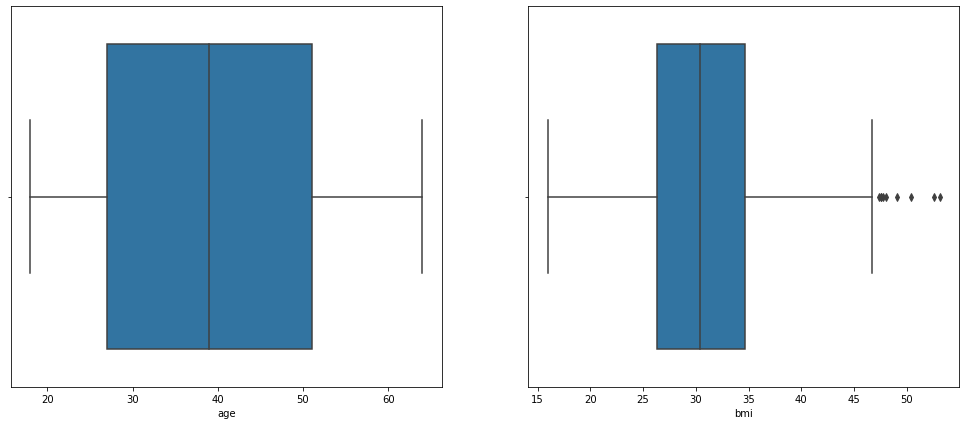

In [39]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.boxplot(df[col])
plt.show()

There are outliers present in the BMI column of the given dataset. Let's check how many rows of the dataset we would lose if we remove these outliers.

In [40]:
df.shape, df[df['bmi']<45].shape

((1338, 7), (1318, 7))

We would only lose 20 data points, and the dataset will no longer have any outliers. Therefore, we can make such a sacrifice.

In [41]:
df = df[df['bmi']<45]

To analyze the correlation between features in this dataset, we must perform Label Encoding on the categorical columns.

In [42]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

Let's create a heatmap to analyze the correlation between variables in the dataset.

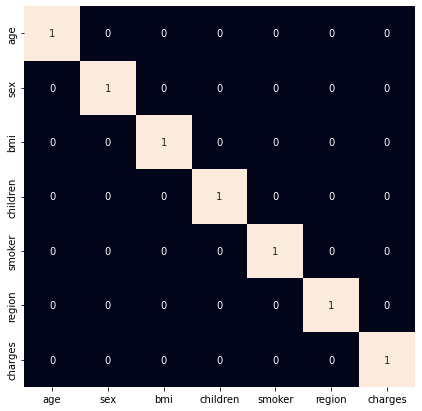

In [43]:
plt.figure(figsize=(7, 7))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

From the above heatmap, we can confirm that there are no highly correlated features present.

# 4
Model Development:

In the academic world, there are many state-of-the-art machine learning models, but some models are more suitable for certain problems, while others may be more suitable than the rest. Therefore, to make this decision, we will divide the data into training data and validation data. Then, we will use the validation data to choose the model with the best performance.

In [44]:
features = df.drop('charges', axis=1)
target = df['charges']
  
X_train, X_val,\
Y_train, Y_val = train_test_split(features, target,
                                  test_size=0.2,
                                  random_state=22)
X_train.shape, X_val.shape

((1054, 6), (264, 6))

Splitting the data into training data and validation data is considered a better practice to achieve stable and fast model training.

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


Now, let's train some state-of-the-art machine learning models on the training data and use the validation data to select the best-performing model for predictions.

In [46]:
models = [LinearRegression(), XGBRegressor(),
          RandomForestRegressor(), AdaBoostRegressor(),
          Lasso(), Ridge()]
  
for i in range(6):
    models[i].fit(X_train, Y_train)
  
    print(f'{models[i]} : ')
    pred_train = models[i].predict(X_train)
    print('Training Error : ', mape(Y_train, pred_train))
  
    pred_val = models[i].predict(X_val)
    print('Validation Error : ', mape(Y_val, pred_val))
    print()

LinearRegression() : 
Training Error :  0.4188805629224122
Validation Error :  0.45044958781215944

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  0.0697883333923925
Validation Error :  0.36004392100129423

RandomForestRegressor() : 
Training Error :  0.12255938348678344
Validation Er

Here, we use MAPE (Mean Absolute Percentage Error) as the metric to evaluate the model's performance. An MAPE value of 0.1 indicates that the prediction error is approximately 10% relative to the actual value.

# 5
Summary:
Among all the models, the RandomForestModel yielded the lowest Mean Absolute Percentage Error (MAPE), indicating that its predictions are closer to the true values compared to the other models.

The dataset we used here is relatively small, but the conclusions drawn from it align closely with the observations in real-life scenarios. With a larger dataset, we would be able to uncover deeper patterns in the relationship between independent features and the premiums charged to buyers.